In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import sklearn

In [2]:
dataset = pd.read_csv('spoiled_data.csv')

In [3]:
dataset.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,0.655968525404552,2.0,6.0,-0.032833673646417205,-4.062045264897834,12.064858107915615,-4.632454,-1.0,4.0,1.0,0
1,1,10.199211979664126,1.0,2.0,1.351357995650444,-3.5717621073746653,9.89244646012535,-1.005013,1.0,1.0,2.0,0
2,2,0.007215371684138306,1.0,10.0,-1.4884445239973123,-3.9464790108710197,10.513220799618184,-8.979408,0.0,3.0,3.0,0
3,3,0.25743120934008346,1.0,9.0,-1.5231538101794566,-4.4502335354549425,11.798010557567801,-6.217044,0.0,6.0,4.0,0
4,4,2.871536319644719,2.0,4.0,-0.5324727856834761,-3.4844525300735434,12.500063315341055,-3.503076,-1.0,15.0,5.0,0
5,5,0.03170502726269676,1.0,10.0,-0.2879513676393681,-3.1567763464297482,10.440380166265024,-7.649405,0.0,1.0,6.0,0
6,6,23.340976871078553,1.0,2.0,1.7851909142465652,-3.3030642419286824,8.818388555541766,-1.927246,1.0,1.0,7.0,0
7,7,0.5172393381191954,1.0,10.0,1.4971889094516242,-3.728847021314069,9.818144845182605,-7.250101,0.0,1.0,8.0,0
8,8,0.48924381817992185,1.0,9.0,-1.501273507235921,-2.1286895171216385,11.487445509925092,-6.407892,0.0,2.0,9.0,0
9,9,6.952002912136506,2.0,4.0,-0.18041965867028842,-2.9820964750513976,12.008290731110531,-3.318231,-1.0,4.0,10.0,0


In [4]:
dataset.pop('Unnamed: 0')
dataset = dataset.rename(columns={'0':'sign 1', '1':'sign 2', '2':'sign 3', '3':'sign 4', '4':'sign 5', '5':'sign 6', '6':'sign 7', '7':'sign 8', '8':'sign 9', '9':'sign 10', '10':'day'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sign 1   1985 non-null   object 
 1   sign 2   1985 non-null   object 
 2   sign 3   1985 non-null   float64
 3   sign 4   1985 non-null   object 
 4   sign 5   1985 non-null   object 
 5   sign 6   1985 non-null   object 
 6   sign 7   1985 non-null   float64
 7   sign 8   1985 non-null   object 
 8   sign 9   1985 non-null   float64
 9   sign 10  1985 non-null   object 
 10  day      1985 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 170.7+ KB


In [11]:
dataset_train = dataset[dataset['day'] != 8]
dataset_train = dataset_train.astype({'sign 1':float, 'sign 2':float, })
dataset_test = dataset[dataset['day'] == 8]

In [6]:
dataset_train.head(10)

,sign 1,sign 2,sign 3,sign 4,sign 5,sign 6,sign 7,sign 8,sign 9,sign 10,day
0,0.655968525404552,2.0,6.0,-0.032833673646417205,-4.062045264897834,12.064858107915615,-4.632454,-1.0,4.0,1.0,0
1,10.199211979664126,1.0,2.0,1.351357995650444,-3.5717621073746653,9.89244646012535,-1.005013,1.0,1.0,2.0,0
2,0.007215371684138306,1.0,10.0,-1.4884445239973123,-3.9464790108710197,10.513220799618184,-8.979408,0.0,3.0,3.0,0
3,0.25743120934008346,1.0,9.0,-1.5231538101794566,-4.4502335354549425,11.798010557567801,-6.217044,0.0,6.0,4.0,0
4,2.871536319644719,2.0,4.0,-0.5324727856834761,-3.4844525300735434,12.500063315341055,-3.503076,-1.0,15.0,5.0,0
5,0.03170502726269676,1.0,10.0,-0.2879513676393681,-3.1567763464297482,10.440380166265024,-7.649405,0.0,1.0,6.0,0
6,23.340976871078553,1.0,2.0,1.7851909142465652,-3.3030642419286824,8.818388555541766,-1.927246,1.0,1.0,7.0,0
7,0.5172393381191954,1.0,10.0,1.4971889094516242,-3.728847021314069,9.818144845182605,-7.250101,0.0,1.0,8.0,0
8,0.48924381817992185,1.0,9.0,-1.501273507235921,-2.1286895171216385,11.487445509925092,-6.407892,0.0,2.0,9.0,0
9,6.952002912136506,2.0,4.0,-0.18041965867028842,-2.9820964750513976,12.008290731110531,-3.318231,-1.0,4.0,10.0,0


In [7]:
dataset_test.head(10)

,sign 1,sign 2,sign 3,sign 4,sign 5,sign 6,sign 7,sign 8,sign 9,sign 10,day
1585,-,-,5.0,0.17723993863393606,-,9.90018886549262,-3.803903,-1.0,0.0,1.0,8
1586,0.04667945495505864,-,10.0,-,-,-,-8.715818,0.0,0.0,2.0,8
1587,-,2.0,5.0,-1.1260640196914773,-3.67909491943822,-,-3.687618,-1.0,4.0,3.0,8
1588,1.0484621681558046,2.0,7.0,2.2135076634427557,-,-,-4.917433,-,0.0,4.0,8
1589,-,-,10.0,-1.5941691518602998,-,11.878856702666639,-8.857871,0.0,5.0,-,8
1590,0.5641990122662836,2.0,7.0,1.1102489331095842,-,9.748715958980652,-5.243750,0.0,0.0,6.0,8
1591,-,1.0,10.0,-,-,10.087325853740051,-8.622316,-,3.0,-,8
1592,-,2.0,7.0,1.0094151399770854,-,-,-5.329994,0.0,0.0,8.0,8
1593,1.9836426189582779,2.0,5.0,-,-,-,-3.801392,-1.0,1.0,-,8
1594,1.5125777854637792,-,8.0,-,-,9.526563662674851,-5.870731,0.0,1.0,-,8


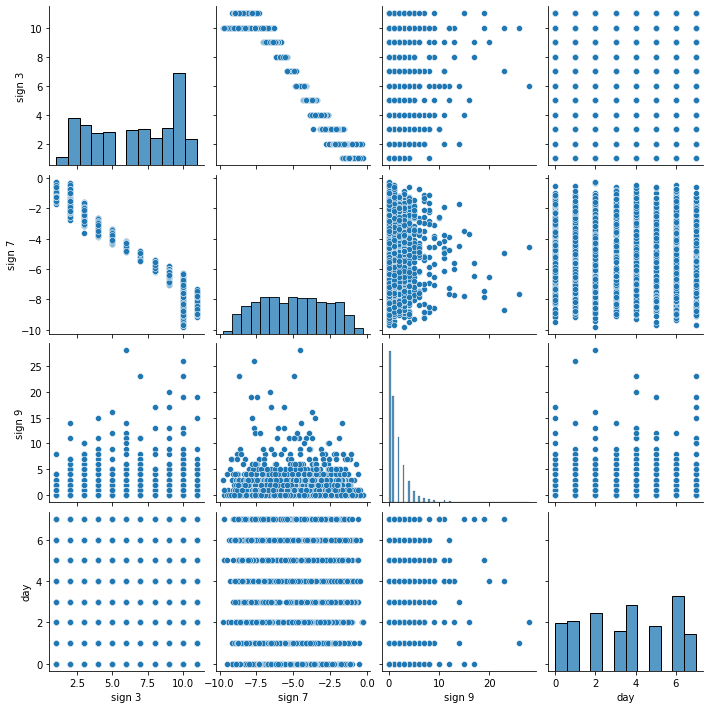

In [8]:
sns.pairplot(dataset_train)